In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [16]:
amostra_df = pd.read_csv('Tabelas/amostras_df.csv')
amostra_df.head()

,Data da Coleta,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira
0,01/01/2014,S,PR,CURITIBA,DIESEL S10,2.599,Litro,IPIRANGA
1,01/01/2014,S,PR,CURITIBA,ETANOL,1.959,Litro,BRANCA
2,01/01/2014,S,SC,FLORIANOPOLIS,GASOLINA,2.999,Litro,PETROBRAS DISTRIBUIDORA S.A.
3,01/01/2014,S,SC,PALHOCA,DIESEL,2.549,Litro,ALESAT
4,01/01/2014,S,PR,CURITIBA,GASOLINA,2.949,Litro,RAIZEN


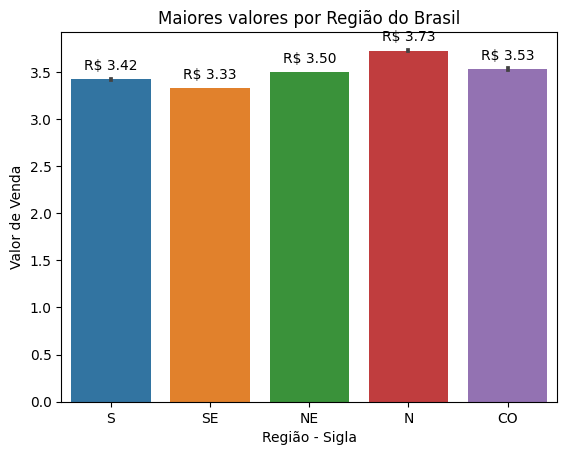

In [17]:
grafico1 = sns.barplot(amostra_df, x='Regiao - Sigla', y='Valor de Venda')

plt.xlabel('Região - Sigla')
plt.ylabel('Valor de Venda')
plt.title('Maiores valores por Região do Brasil')

for p in grafico1.patches:
    valor = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, valor + 0.1, f'R$ {valor:.2f}', ha='center')

if not os.path.exists("Graficos_salvos"):
    os.makedirs("Graficos_salvos")

plt.savefig("Graficos_salvos/Maiores-valores-por-Regiao-do-Brasil.png")

plt.show()

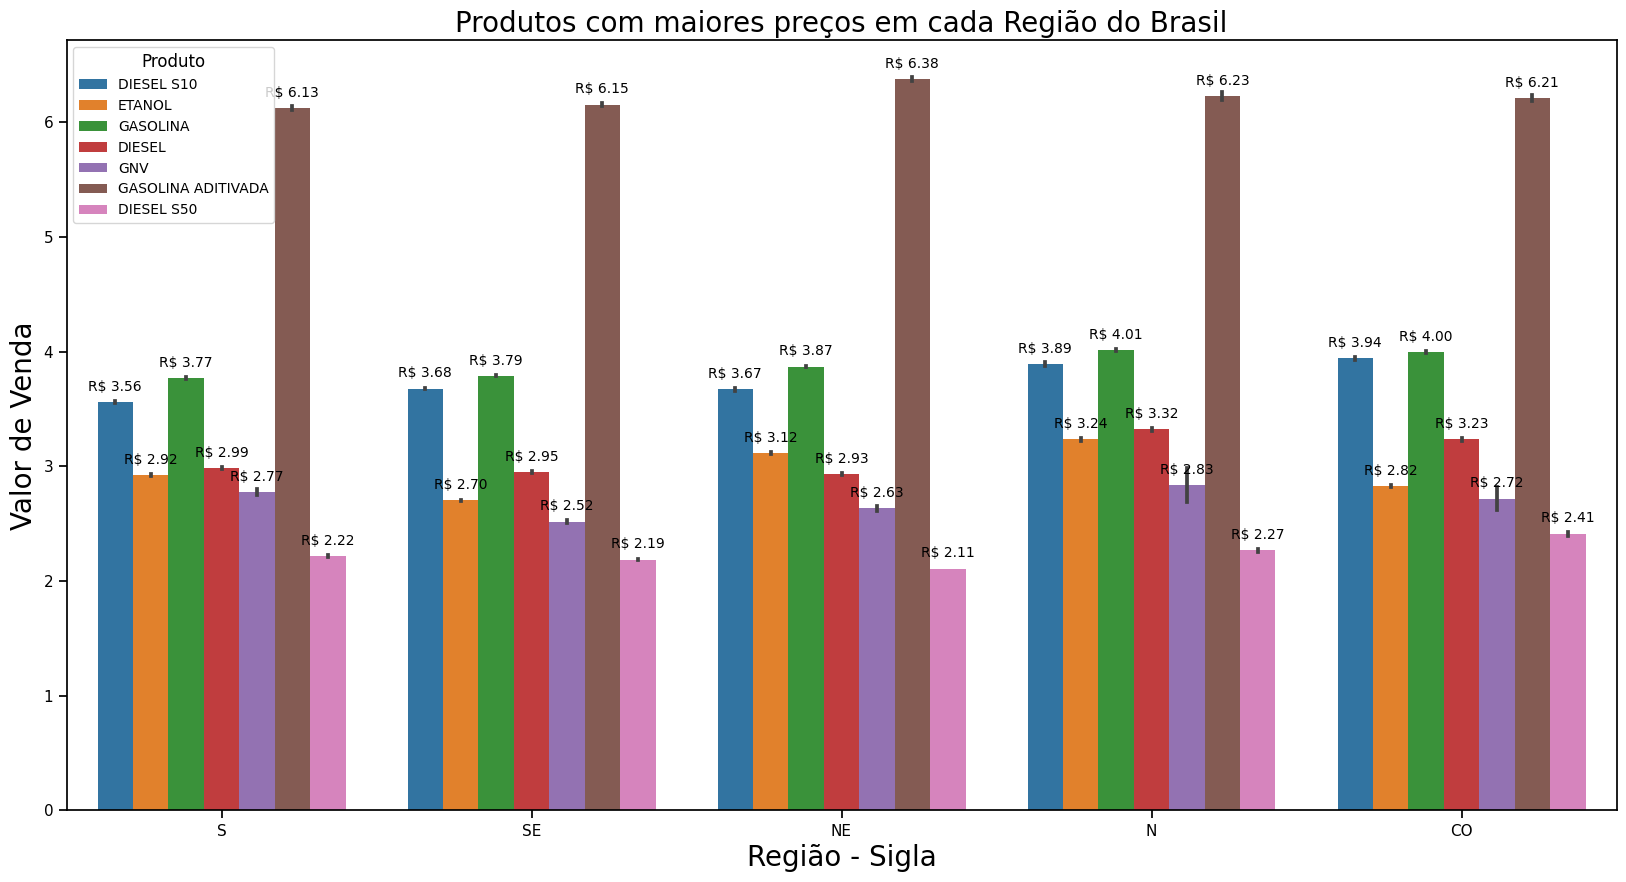

In [26]:
plt.figure(figsize=(20, 10))
sns.set_context("notebook", rc={"legend.fontsize": 10, "axes.titlesize": 20, "axes.labelsize": 20})

grafico2 = sns.barplot(data=amostra_df, x='Regiao - Sigla', y='Valor de Venda', hue='Produto')

plt.xlabel('Região - Sigla')
plt.ylabel('Valor de Venda')
plt.title('Produtos com maiores preços em cada Região do Brasil')

for p in grafico2.patches:
    valor = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, valor + 0.1, f'R$ {valor:.2f}', ha='center', fontsize=10)

plt.savefig("Graficos_salvos/Produtos-com-maiores-preços-em-cada-Região-do-Brasil.png")

plt.show()

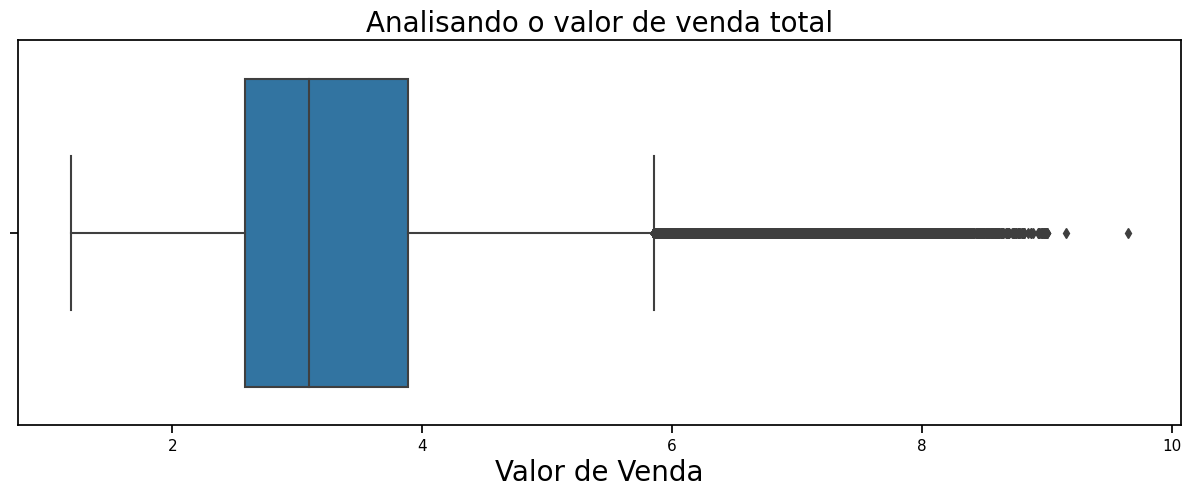

In [19]:
plt.figure(figsize=(15, 5))
grafico3 = sns.boxplot(data=amostra_df, x='Valor de Venda')

plt.xlabel('Valor de Venda')
plt.title('Analisando o valor de venda total')

plt.savefig("Graficos_salvos/Analisando-o-valor-de-venda-total.png")

plt.show()

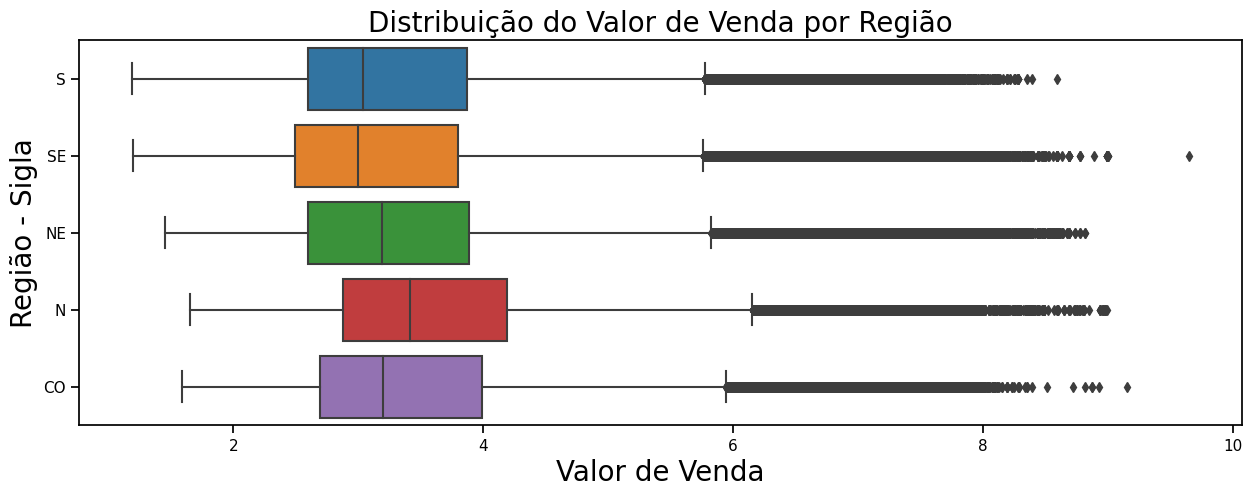

In [20]:
plt.figure(figsize=(15, 5))
grafico3 = sns.boxplot(data=amostra_df, x='Valor de Venda', y='Regiao - Sigla')

plt.ylabel('Região - Sigla')
plt.xlabel('Valor de Venda')
plt.title('Distribuição do Valor de Venda por Região')

plt.savefig("Graficos_salvos/Distribuição-do-Valor-de-Venda-por-Região.png")

plt.show()


In [21]:
amostra_df.head()

,Data da Coleta,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira
0,01/01/2014,S,PR,CURITIBA,DIESEL S10,2.599,Litro,IPIRANGA
1,01/01/2014,S,PR,CURITIBA,ETANOL,1.959,Litro,BRANCA
2,01/01/2014,S,SC,FLORIANOPOLIS,GASOLINA,2.999,Litro,PETROBRAS DISTRIBUIDORA S.A.
3,01/01/2014,S,SC,PALHOCA,DIESEL,2.549,Litro,ALESAT
4,01/01/2014,S,PR,CURITIBA,GASOLINA,2.949,Litro,RAIZEN


In [22]:
somas_por_bandeira = amostra_df.groupby('Bandeira')['Valor de Venda'].sum().sort_values(ascending=False)
somas_por_bandeira.to_csv('Tabelas/somas_por_bandeira.csv')
somas_por_bandeira.head()

Bandeira
BRANCA                          1850203.346
PETROBRAS DISTRIBUIDORA S.A.    1119783.457
IPIRANGA                         998611.823
RAIZEN                           791020.645
VIBRA ENERGIA                    312878.330
Name: Valor de Venda, dtype: float64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


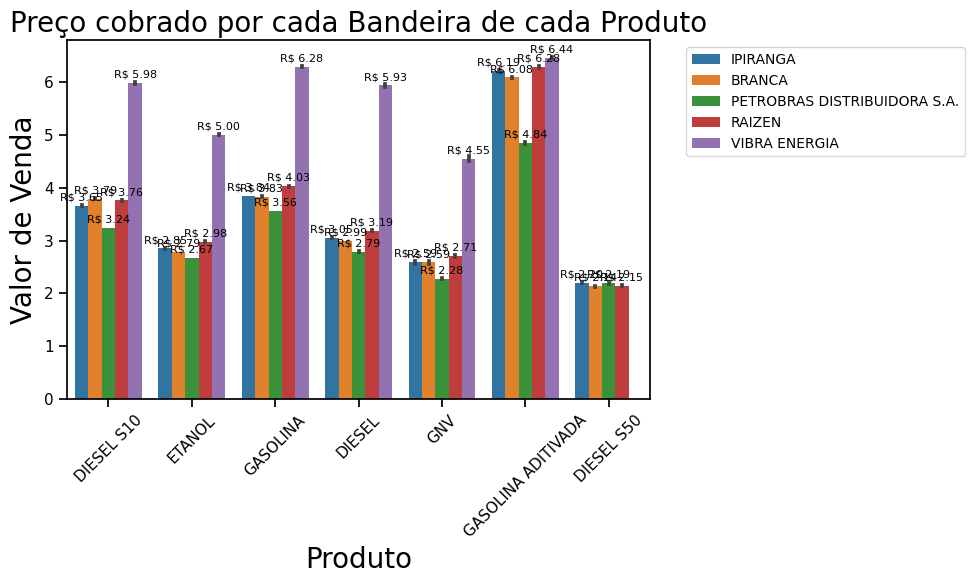

In [23]:
top_5_bandeiras = somas_por_bandeira.head(5).index

amostra_top_5 = amostra_df[amostra_df['Bandeira'].isin(top_5_bandeiras)]

plt.figure(figsize=(10, 6))
grafico4 = sns.barplot(data=amostra_top_5, x='Produto', y='Valor de Venda', hue='Bandeira')

plt.xlabel('Produto')
plt.ylabel('Valor de Venda')
plt.title('Preço cobrado por cada Bandeira de cada Produto')

for p in grafico4.patches:
    valor = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, valor + 0.1, f'R$ {valor:.2f}', ha='center', fontsize=8)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.savefig("Graficos_salvos/Preço-cobrado-por-cada-Bandeira-de-cada-Produto.png")

plt.tight_layout()
plt.show()

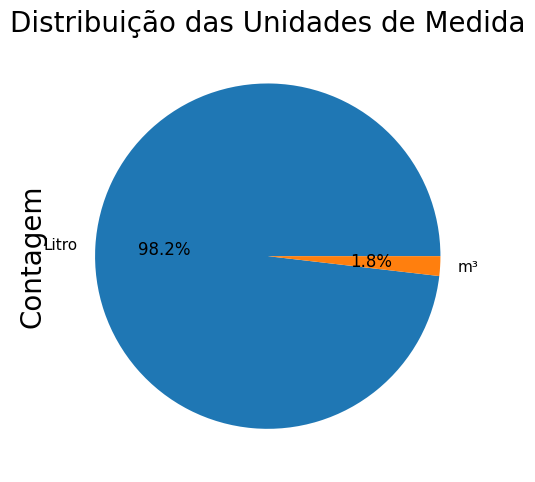

In [24]:
plt.figure(figsize=(5, 5))

grafico = amostra_df['Unidade de Medida'].value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Distribuição das Unidades de Medida')
plt.ylabel('Contagem')

plt.savefig("Graficos_salvos/Distribuição-das-Unidades-de-Medida.png")

plt.tight_layout()
plt.show()

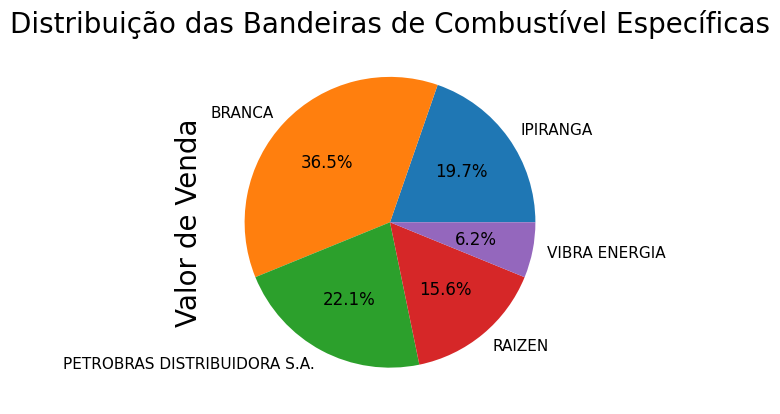

In [25]:
maiores_bandeiras = ["IPIRANGA", "BRANCA", "PETROBRAS DISTRIBUIDORA S.A.", "RAIZEN", "VIBRA ENERGIA"]

somas_bandeiras = somas_por_bandeira[maiores_bandeiras]

plt.figure(figsize=(6, 6))

grafico = somas_bandeiras.plot.pie(autopct='%1.1f%%')

plt.title('Distribuição das Bandeiras de Combustível Específicas')

plt.tight_layout()

plt.savefig("Graficos_salvos/Distribuição-das-Bandeiras-de-Combustível-Específicas.png")

plt.show()